
#Importing Libraries


Credits: T. Kardi and Jason

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

#Generate Data:Linear Separable Data

In [ ]:
X_train = np.array([[1,2],
             [5,8],
             [1.5,0.8],
             [8,8],
             [1,0.6],
             [9,11]])
y_train = ([-1,1,-1,1,-1,1])
print(X_train)
print(y_train)

[[ 1.   2. ]
 [ 5.   8. ]
 [ 1.5  0.8]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]]
[-1, 1, -1, 1, -1, 1]


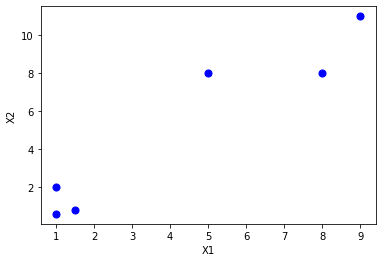

In [ ]:

plt.scatter(X_train[:,0],X_train[:,1],c='b',s=50)
plt.xlabel('X1')
plt.ylabel('X2');

In [ ]:
target_names=['-1','+1']
target_names

['-1', '+1']

In [ ]:
idxPlus = []
idxMin = []
for i, x in enumerate(y_train):
  if x > 0:
    idxPlus.append(i)
  else:
    idxMin.append(i)

In [ ]:
print(idxMin)
print(idxPlus)

[0, 2, 4]
[1, 3, 5]


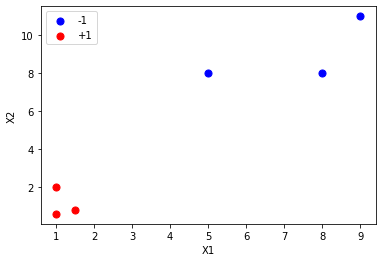

In [ ]:
plt.scatter(X_train[idxPlus,0],X_train[idxPlus,1],c='b',s=50)
plt.scatter(X_train[idxMin,0],X_train[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
plt.xlabel('X1')
plt.ylabel('X2');


In [ ]:
svc = svm.SVC(kernel='linear').fit(X_train,y_train)
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.get_params(True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
lbX1=math.floor(min(X_train[:,0]))-1
ubX1=math.ceil(max(X_train[:,0]))+1
lbX2=math.floor(min(X_train[:,1]))-1
ubX2=math.ceil(max(X_train[:,1]))+1
[lbX1,ubX1,lbX2,ubX2]

[0, 10, -1, 12]

Text(0.5, 1.0, 'Linearly Separable')

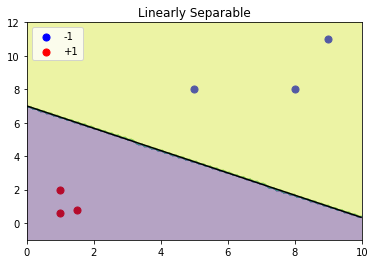

In [ ]:
plt.scatter(X_train[idxPlus,0],X_train[idxPlus,1],c='b',s=50)
plt.scatter(X_train[idxMin,0],X_train[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Linearly Separable')


Text(0.5, 1.0, 'Margin and Support Vectors')

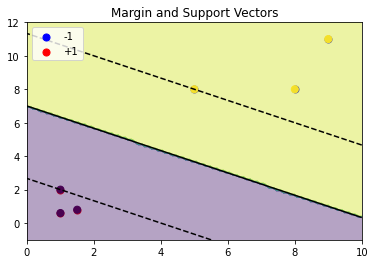

In [ ]:
plt.scatter(X_train[idxPlus,0],X_train[idxPlus,1],c='b',s=50)
plt.scatter(X_train[idxMin,0],X_train[idxMin,1],c='r',s=50)
plt.legend(target_names,loc=2)
X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=50,alpha=0.95);

plt.title('Margin and Support Vectors')


svc.n_support_


In [ ]:
svc.n_support_


array([1, 1], dtype=int32)

In [ ]:
svc.support_vectors_


array([[1., 2.],
       [5., 8.]])

In [ ]:
weight=svc.coef_
intercept=svc.intercept_
a = -weight[0,0] / weight[0,1]
print('x2=',a,' * x1 + ',-intercept[0]/weight[0,1])

x2= -0.6666666666666666  * x1 +  7.0


In [ ]:
svc.score(X_train, y_train)


1.0

In [ ]:
print(svc.predict([[6,8]]))

[1]


Text(0.5, 1.0, 'Prediction')

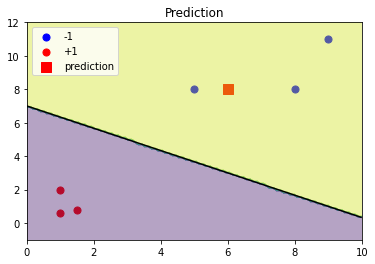

In [ ]:

plt.scatter(X_train[idxPlus,0],X_train[idxPlus,1],c='b',s=50)
plt.scatter(X_train[idxMin,0],X_train[idxMin,1],c='r',s=50)
plt.scatter(6,8,c='r',marker='s',s=90)
plt.legend(['-1','+1','prediction'],loc=2)

X,Y = np.mgrid[lbX1:ubX1:100j,lbX2:ubX2:100j]
Z = svc.decision_function(np.c_[X.ravel(),Y.ravel()])
Z = Z.reshape(X.shape)
plt.contourf(X,Y,Z > 0,alpha=0.4)
plt.contour(X,Y,Z,colors=['k'], linestyles=['-'],levels=[0])

plt.title('Prediction')
